In [1]:
from cymetric import timeseries as com
from cymetric import graphs as gr


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import cymetric as cym
db = cym.dbopen('cyclus.sqlite')
ev = cym.Evaluator(db=db, write=False)

In [3]:
power = com.get_power(ev, facilities=['pwr'])

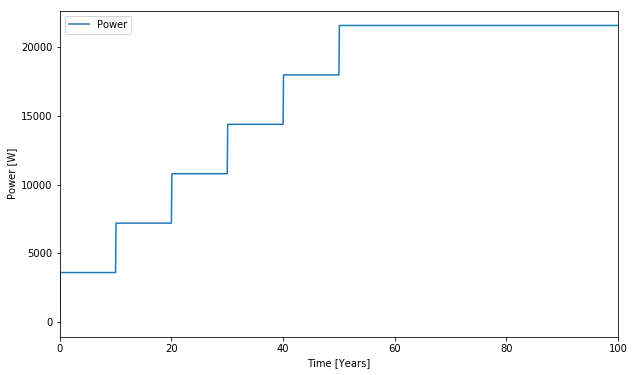

In [4]:
power_dat = pd.DataFrame({'Time': power.Time/12., 'Power': power.Value})
e1x = power_dat.plot(x='Time', y='Power', figsize=(10, 6))

#plt.ylim([0,1000000])
plt.xlabel('Time [Years]')
plt.ylabel('Power [W]')
plt.savefig('power.png', dpi=326)

In [5]:
PU9 = com.inventories(ev, facilities=['storage_uox_spent'],nucs=['239Pu'] )



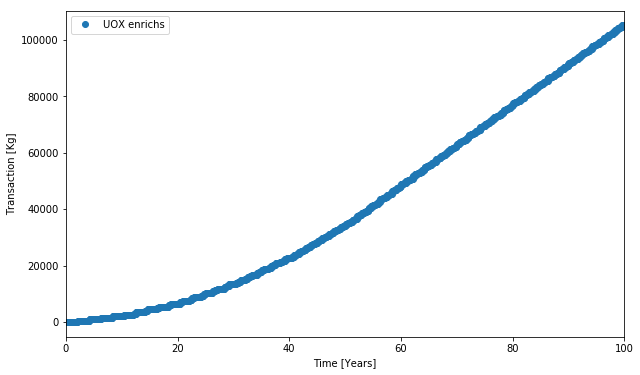

In [6]:
uox_dat = pd.DataFrame({'Time': PU9.Time/12., 'UOX enrichs': PU9.Mass})
e1x = uox_dat.plot(x='Time', y='UOX enrichs', figsize=(10, 6), linestyle=' ', marker='o')








#FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x)




#plt.ylim([0,3000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)

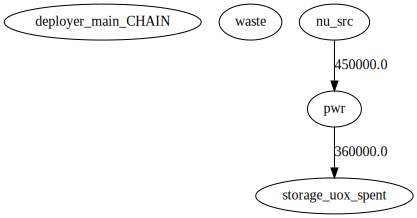

In [7]:
cym.graphs.flow_graph(ev)